c:\Users\Sajab\Desktop\deep_learning_and_github\src\data_loader.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['node-caps'].fillna('unknown', inplace=True)
c:\Users\Sajab\Desktop\deep_learning_and_github\src\data_loader.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fold 1/5
Epoch [10/150], Train Loss: 0.7266, Validation Loss: 0.7158, Validation Accuracy: 34.78%
Epoch [20/150], Train Loss: 0.7017, Validation Loss: 0.6808, Validation Accuracy: 52.17%
Epoch [30/150], Train Loss: 0.6797, Validation Loss: 0.6500, Validation Accuracy: 76.09%
Epoch [40/150], Train Loss: 0.6596, Validation Loss: 0.6215, Validation Accuracy: 84.78%
Epoch [50/150], Train Loss: 0.6412, Validation Loss: 0.5953, Validation Accuracy: 82.61%
Epoch [60/150], Train Loss: 0.6244, Validation Loss: 0.5710, Validation Accuracy: 84.78%
Epoch [70/150], Train Loss: 0.6086, Validation Loss: 0.5485, Validation Accuracy: 86.96%
Epoch [80/150], Train Loss: 0.5943, Validation Loss: 0.5287, Validation Accuracy: 86.96%
Epoch [90/150], Train Loss: 0.5816, Validation Loss: 0.5117, Validation Accuracy: 86.96%
Epoch [100/150], Train Loss: 0.5707, Validation Loss: 0.4985, Validation Accuracy: 86.96%
Epoch [110/150], Train Loss: 0.5611, Validation Loss: 0.4888, Validation Accuracy: 86.96%
Epoch [120

<Figure size 1200x600 with 0 Axes>

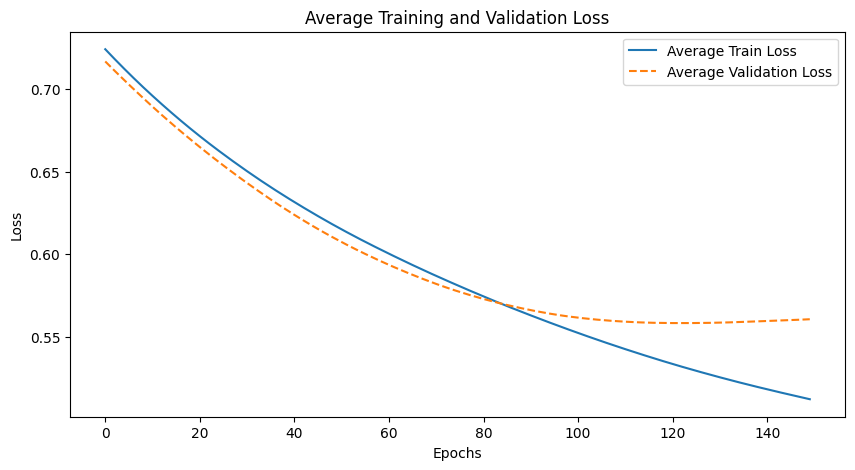

In [1]:
import matplotlib.pyplot as plt
from src.data_loader import load_and_preprocess_data
from src.train import initialize_model, train_model, evaluate_model
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
import random

# Function to set a random seed
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set random seed for reproducibility
set_seed(42)

# Path to your data file
file_path = 'data/breast-cancer-data.csv'

# Load and preprocess data
X, X_test, y, y_test, label_encoders = load_and_preprocess_data(file_path)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)  # Ensure the test set is scaled similarly

# Define model parameters
input_size = X.shape[1]       # Number of features
hidden_size = 16             # Adjustable hyperparameter
output_size = len(set(y))     # For binary classification

# Initialize k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_accuracies = []

# Initialize lists to collect losses for plotting
all_train_losses = []
all_val_losses = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}/{k_folds}")
    
    # Split data into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Initialize the model
    model = initialize_model(input_size, hidden_size, output_size)

    # Train the model on the current fold
    trained_model, train_losses, val_losses, val_accuracies = train_model(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        num_epochs=180,          # Specify num_epochs as a keyword argument
        learning_rate=0.001      # Specify learning_rate as a keyword argument
    )
    
    # Append the losses for the fold
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    
    # Evaluate the model on the validation set for the current fold
    fold_accuracy = evaluate_model(trained_model, X_val, y_val)
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy for fold {fold + 1}: {fold_accuracy * 100:.2f}%\n")

# Calculate average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"Average Accuracy across {k_folds} folds: {average_accuracy * 100:.2f}%")

# Final evaluation on test set
test_accuracy = evaluate_model(trained_model, X_test, y_test)
print(f"Final Test Set Accuracy: {test_accuracy * 100:.2f}%")

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))

import matplotlib.pyplot as plt

# Calculate the average training and validation losses across all folds for each epoch
avg_train_losses = np.mean(all_train_losses, axis=0)
avg_val_losses = np.mean(all_val_losses, axis=0)

# Plotting the average training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(avg_train_losses, label='Average Train Loss')
plt.plot(avg_val_losses, label='Average Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

